# Experiment list :  Question No - 06

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to categorical
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

In [3]:
# Create data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1)
])

In [4]:

# Function to create the CNN model (as specified in question 5)
def create_cnn_model():
    model = models.Sequential([
        # CNN layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.Dropout(0.4),
        layers.MaxPooling2D((3, 3), strides=(1, 1)),
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.Dropout(0.4),
        layers.MaxPooling2D((3, 3), strides=(1, 1)),

        # Flatten layer
        layers.Flatten(),

        # Dense layers
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    return model

In [5]:
# Create and compile models
original_model = create_cnn_model()
augmented_model = create_cnn_model()

# Compile both models
original_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

augmented_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Train original model
original_history = original_model.fit(
    x_train, y_train,
    epochs=30,
    validation_data=(x_test, y_test),
    batch_size=64
)

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8782 - loss: 0.3883 - val_accuracy: 0.9838 - val_loss: 0.1474
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9812 - loss: 0.0621 - val_accuracy: 0.9852 - val_loss: 0.1114
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9862 - loss: 0.0447 - val_accuracy: 0.9883 - val_loss: 0.1023
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9882 - loss: 0.0377 - val_accuracy: 0.9878 - val_loss: 0.0802
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9898 - loss: 0.0331 - val_accuracy: 0.9886 - val_loss: 0.0559
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9901 - loss: 0.0307 - val_accuracy: 0.9893 - val_loss: 0.0565
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9918 - loss: 0.0254 - val_accuracy: 0.9892 - val_loss: 0.0602
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9909 - loss: 0.0254 - val_accuracy: 

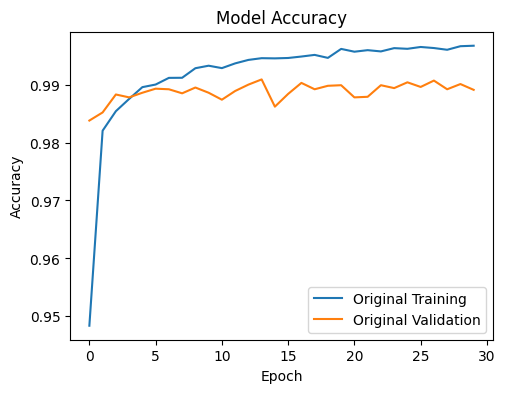

In [7]:
# Plot training history comparison
plt.figure(figsize=(12, 4))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(original_history.history['accuracy'], label='Original Training')
plt.plot(original_history.history['val_accuracy'], label='Original Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [8]:
# Train augmented model
augmented_history = augmented_model.fit(
    data_augmentation(x_train, training=True), y_train,
    epochs=30,
    validation_data=(x_test, y_test),
    batch_size=64
)


Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7279 - loss: 0.8309 - val_accuracy: 0.9444 - val_loss: 0.2687
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9264 - loss: 0.2385 - val_accuracy: 0.9703 - val_loss: 0.1547
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9420 - loss: 0.1821 - val_accuracy: 0.9716 - val_loss: 0.1317
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9532 - loss: 0.1525 - val_accuracy: 0.9716 - val_loss: 0.1271
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9599 - loss: 0.1323 - val_accuracy: 0.9636 - val_loss: 0.1378
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9629 - loss: 0.1162 - val_accuracy: 0.9556 - val_loss: 0.1709
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9659 - loss: 0.1089 - val_accuracy: 0.9689 - val_loss: 0.1169
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9691 - loss: 0.0983 - val_accuracy: 0

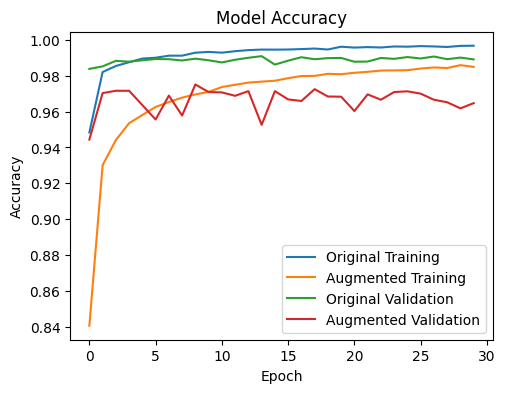

In [9]:
# Plot training history comparison
plt.figure(figsize=(12, 4))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(original_history.history['accuracy'], label='Original Training')
plt.plot(augmented_history.history['accuracy'], label='Augmented Training')
plt.plot(original_history.history['val_accuracy'], label='Original Validation')
plt.plot(augmented_history.history['val_accuracy'], label='Augmented Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

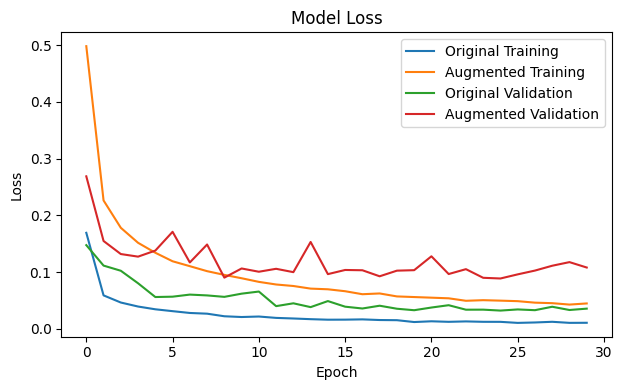

In [10]:
# Plot training history comparison
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(original_history.history['loss'], label='Original Training')
plt.plot(augmented_history.history['loss'], label='Augmented Training')
plt.plot(original_history.history['val_loss'], label='Original Validation')
plt.plot(augmented_history.history['val_loss'], label='Augmented Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


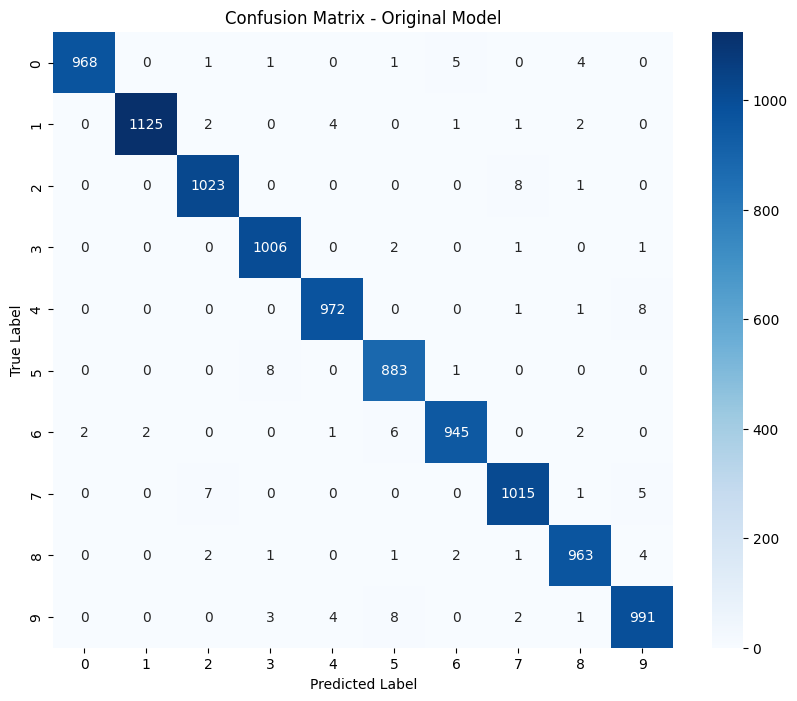

In [11]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Generate predictions and confusion matrices
original_pred = np.argmax(original_model.predict(x_test), axis=1)
augmented_pred = np.argmax(augmented_model.predict(x_test), axis=1)

# Plot confusion matrices
plot_confusion_matrix(y_test, original_pred, 'Confusion Matrix - Original Model')

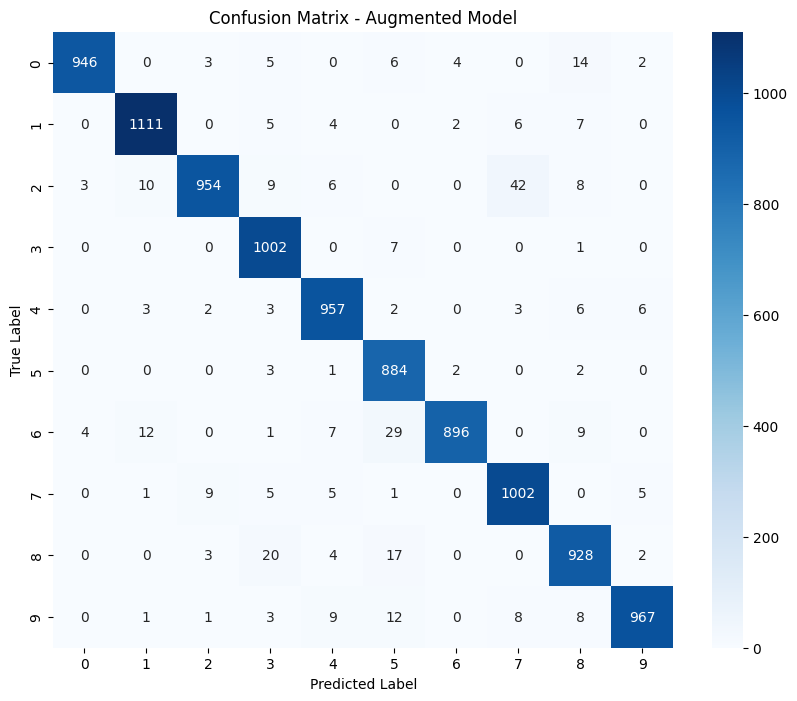

In [12]:
plot_confusion_matrix(y_test, augmented_pred, 'Confusion Matrix - Augmented Model')

In [13]:
# Print final evaluation results
print("\nOriginal Model Evaluation:")
original_eval = original_model.evaluate(x_test, y_test)
print(f"Test accuracy: {original_eval[1]:.4f}")

print("\nAugmented Model Evaluation:")
augmented_eval = augmented_model.evaluate(x_test, y_test)
print(f"Test accuracy: {augmented_eval[1]:.4f}")


Original Model Evaluation:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9864 - loss: 0.0427
Test accuracy: 0.9891

Augmented Model Evaluation:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9594 - loss: 0.1213
Test accuracy: 0.9647


In [14]:
# Calculate and print per-class accuracy for both models
def print_per_class_accuracy(y_true, y_pred, model_name):
    print(f"\n{model_name} - Per-class Accuracy:")
    for i in range(10):
        class_mask = (y_true == i)
        class_accuracy = np.mean(y_pred[class_mask] == y_true[class_mask])
        print(f"Class {i}: {class_accuracy:.4f}")

print_per_class_accuracy(y_test, original_pred, "Original Model")
print_per_class_accuracy(y_test, augmented_pred, "Augmented Model")


Original Model - Per-class Accuracy:
Class 0: 0.9878
Class 1: 0.9912
Class 2: 0.9913
Class 3: 0.9960
Class 4: 0.9898
Class 5: 0.9899
Class 6: 0.9864
Class 7: 0.9874
Class 8: 0.9887
Class 9: 0.9822

Augmented Model - Per-class Accuracy:
Class 0: 0.9653
Class 1: 0.9789
Class 2: 0.9244
Class 3: 0.9921
Class 4: 0.9745
Class 5: 0.9910
Class 6: 0.9353
Class 7: 0.9747
Class 8: 0.9528
Class 9: 0.9584
